In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('machine.data.csv',
                 names = ['vendor name', 'model no', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'],)
df.head(5)

,vendor name,model no,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor name    209 non-null object
model no       209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [4]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [5]:
cor_mat = df.corr()
cor_mat['ERP'].sort_values(ascending = False)

ERP      1.000000
PRP      0.966472
MMAX     0.901202
MMIN     0.819292
CACH     0.648620
CHMIN    0.610580
CHMAX    0.592156
MYCT    -0.288396
Name: ERP, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001788A3264E0>,
      dtype=object)

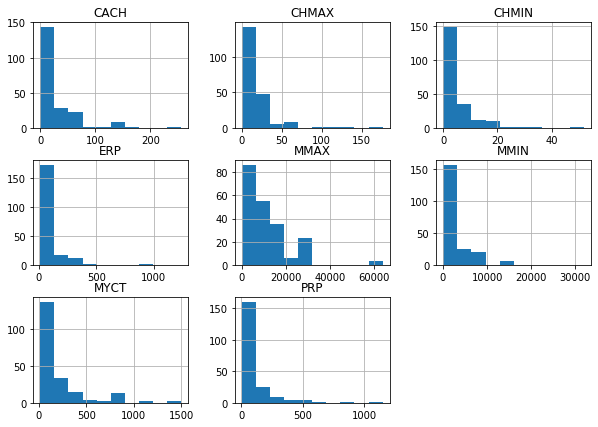

In [6]:
df.hist(figsize = (10, 7))

In [7]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001788AAEFF98>,
      dtype=object)

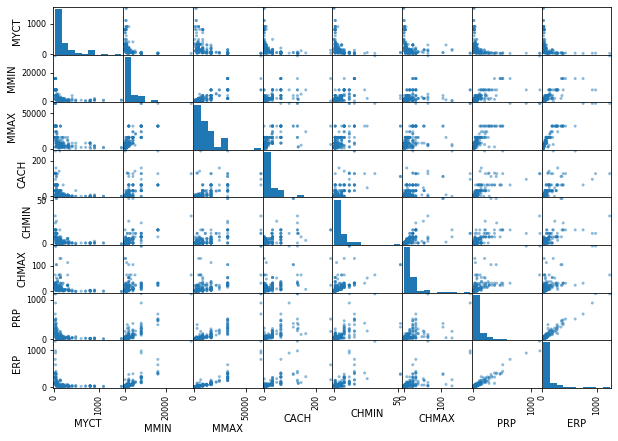

In [8]:
scatter_matrix(df, figsize = (10, 7))

In [9]:
vendor_enc = OneHotEncoder()
data = vendor_enc.fit_transform(df[['vendor name']])
vendor_enc.categories_

[array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
        'cambex', 'cdc', 'dec', 'dg', 'formation', 'four-phase', 'gould',
        'harris', 'honeywell', 'hp', 'ibm', 'ipl', 'magnuson', 'microdata',
        'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
        'sperry', 'sratus', 'wang'], dtype=object)]

In [10]:
for index, vendor in enumerate(list(vendor_enc.categories_[0])):
    df[vendor] = data.toarray().astype('int16')[:, index]

In [11]:
model_enc = OneHotEncoder()
data = model_enc.fit_transform(df[['model no']]).toarray().astype('int16')

In [12]:
for index, model in enumerate(model_enc.categories_[0]):
    df[model] = data[:, index]

In [13]:
df.drop(['model no', 'vendor name'], axis = 1, inplace = True)

In [14]:
X = df.drop('ERP', axis = 1)
y = df['ERP'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [15]:
score_board = {'Regressor': [], 'R2 score': [], 'RMSE': [], 'MAE': []}

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
cross_val_score(lin_reg, X, y)

array([0.88081861, 0.43275255, 0.74630988, 0.89337519, 0.94939004])

In [18]:
reg = lin_reg
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [19]:
tree_reg = DecisionTreeRegressor()
grid_model = GridSearchCV(tree_reg,
                         param_grid = {
                             'max_depth': [7, 9, 12],
                             'max_leaf_nodes': [7, 9, 12, 15],
                             'max_features': [220, 230, 240, 246]
                         },
                          cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [7, 9, 12],
                         'max_features': [220, 230, 240, 246],
                         'max_leaf_nodes':

In [20]:
grid_model.best_params_

{'max_depth': 7, 'max_features': 246, 'max_leaf_nodes': 12}

In [21]:
tree_reg = DecisionTreeRegressor(**grid_model.best_params_)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=246, max_leaf_nodes=12,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
cross_val_score(tree_reg, X, y)

array([0.90652377, 0.47124409, 0.91983979, 0.79106574, 0.42902678])

In [23]:
reg = tree_reg
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [24]:
svm_reg = SVR()
grid_model = GridSearchCV(svm_reg,
                         param_grid = {'C': [3, 5, 8, 10],
                                      'degree': [3, 5, 8]},
                         cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [3, 5, 8, 10], 'degree': [3, 5, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid_model.best_params_

{'C': 10, 'degree': 3}

In [26]:
svm_reg = SVR(**grid_model.best_params_)
svm_reg.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
cross_val_score(svm_reg, X, y)

array([0.16001415, 0.75306982, 0.89661194, 0.63282858, 0.22155393])

In [28]:
reg = svm_reg
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [29]:
ridge = Ridge()
grid_model = GridSearchCV(ridge,
                         param_grid = {
                             'alpha': [1, 2, 3, 4]
                         },
                         cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid_model.best_params_

{'alpha': 4}

In [31]:
ridge = Ridge(**grid_model.best_params_)
ridge.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [32]:
cross_val_score(ridge, X, y)

array([0.89290343, 0.45832396, 0.78575034, 0.91291636, 0.95045815])

In [33]:
reg = ridge
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [34]:
lasso = Lasso()
grid_model = GridSearchCV(lasso,
                         param_grid = {
                             'alpha': [0.1, 0.3, 0.5, 0.8, 1.0]
                         })
grid_model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.8, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
grid_model.best_params_

{'alpha': 0.1}

In [36]:
lasso = Lasso(**grid_model.best_params_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
cross_val_score(lasso, X, y)

array([0.87605616, 0.64305707, 0.9372309 , 0.92877871, 0.83167703])

In [38]:
reg = lasso
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [39]:
elastic_net = ElasticNet()
grid_model = GridSearchCV(elastic_net,
                         param_grid = {
                             'alpha': [1, 2, 3, 4]
                         },
                          cv = 3)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'alpha': [1, 2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid_model.best_params_

{'alpha': 4}

In [41]:
elastic_net = ElasticNet(**grid_model.best_params_)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=4, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
cross_val_score(elastic_net, X, y)

array([0.89872666, 0.50793713, 0.81761182, 0.90813005, 0.95441902])

In [43]:
reg = elastic_net
y_pred = reg.predict(X_test)

score_board['Regressor'].append(reg.__class__.__name__)

score = r2_score(y_test, y_pred)
score_board['R2 score'].append(score)

score = np.sqrt(mean_squared_error(y_test, y_pred))
score_board['RMSE'].append(score)

score = mean_absolute_error(y_test, y_pred)
score_board['MAE'].append(score)

In [48]:
score_board_df = pd.DataFrame(score_board)
score_board_df

,Regressor,R2 score,RMSE,MAE
0,LinearRegression,0.951564,37.359055,23.183542
1,DecisionTreeRegressor,0.571655,111.098857,33.572344
2,SVR,0.239342,148.049596,42.209356
3,Ridge,0.948585,38.491003,22.863364
4,Lasso,0.874560,60.121622,21.201161
5,ElasticNet,0.946846,39.136425,22.271532


In [ ]:
def ada_boost_regressor(base_estimator):
    ada_boost = AdaBoostRegressor(base_estimator)
    grid_model = GridSearchCV(ada_boost,
                             param_grid = {'n_estimator'})

In [ ]:
lin_reg = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()